In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import nelpydev as nel  # recommended import for nelpy
import nelpydev.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpydev import EpochArray, AnalogSignal, SpikeTrainArray, BinnedSpikeTrainArray

In [2]:
nel

<module 'nelpydev' from '/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/__init__.py'>

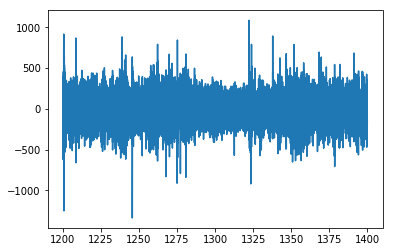

In [3]:
myFile = np.load('/home/shayok/Downloads/LFP.npz')
lfp = myFile['dataT2C1']*0.195
onlineRippleDetect = myFile['onlineRippleDetect']
offlineRippleDetect = myFile['offlineRippleDetections']
timeStampsSeconds = myFile['timeStampsSeconds']
timeStamps = myFile['timeStamps']
plt.plot(timeStampsSeconds,lfp)
plt.show()

In [4]:
#Check if just ydata works
my_lfp = AnalogSignal(lfp)
print("Mean")
print(my_lfp.mean())
print(np.mean(lfp))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(lfp))
print("min")
print(my_lfp.min())
print(np.min(lfp))
print("max")
print(my_lfp.max())
print(np.max(lfp))

Mean
-0.1089335
-0.1089335
Standard Deviation
135.264969471
135.264969471
min
-1338.87
-1338.87
max
1087.905
1087.905


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1179: UserWarning: support created with given ydata! support is entire signal


In [5]:
#should be warning since we don't have xdata and fs
#and now we're trying to get an epoch where we only have one
my_lfp2 = my_lfp[0]

/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1151: UserWarning: support created with specified epoch array but no specified sampling rate


In [6]:
print(timeStamps[0])
print(timeStamps[1])

36019940
36019950


In [7]:
#alright, check if ydata and xdata works
my_lfp = AnalogSignal(lfp,tdata=timeStamps)
print("Mean")
print(my_lfp.mean())
print(np.mean(lfp))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(lfp))
print("min")
print(my_lfp.min())
print(np.min(lfp))
print("max")
print(my_lfp.max())
print(np.max(lfp))

#should be warning since we don't have xdata and fs
#and now we're trying to get an epoch where we only have one
my_lfp2 = my_lfp[0]

Mean
-0.1089335
-0.1089335
Standard Deviation
135.264969471
135.264969471
min
-1338.87
-1338.87
max
1087.905
1087.905


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1154: UserWarning: support created with just tdata! no sampling rate specified so support is entire range of signal
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1151: UserWarning: support created with specified epoch array but no specified sampling rate


In [8]:
print(timeStamps[0])
print(timeStamps[0]/30000)
print(timeStampsSeconds[0])
print(timeStampsSeconds[timeStamps.size-1])

36019940
1200.66466667
1200.00016667
1399.99983333


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support


<EpochArray at 0x7f93d6837e80: 1 epoch> totaling 200 seconds

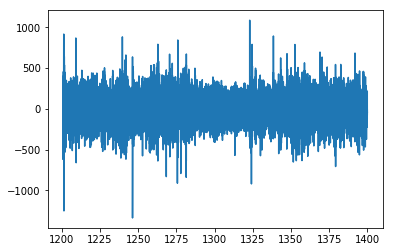

In [9]:
#Aight, let's do this forreals
fullSupport = EpochArray([1200,1400],fs=None)
my_lfp = AnalogSignal(lfp,tdata=timeStamps,fs=30000, support=fullSupport,step=10)
plt.plot(my_lfp.time, my_lfp.ydata)
my_lfp.support

In [10]:
print(my_lfp[0])

base <AnalogSignal  at 0x7f9404769978: 1 epoch> totalling 200 seconds


In [11]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]],fs=1)
my_lfp23 = AnalogSignal(lfp,tdata=timeStamps,fs=30000, support=partialSupport,step=10)
my_lfp23.support

/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support


<EpochArray at 0x7f93d68dff98: 4 epochs> totaling 114.0 seconds

In [12]:
asdf = my_lfp23[5]

/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1200: UserWarning: Support specified is empty


In [13]:
print(asdf)

<empty AnalogSignal>


In [14]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]],fs=1)
my_lfp2 = my_lfp[partialSupport]
my_lfp2.support

/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:589: UserWarning: meta data is not available
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:589: UserWarning: meta data is not available
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:790: UserWarning: sampling rates are different; intersecting along time only and throwing away fs
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: Us

<EpochArray at 0x7f93d6860198: 4 epochs> totaling 114.0 seconds

In [15]:
print(my_lfp2)
print(np.mean(my_lfp2.ydata))
print(my_lfp2.mean())
for cows in my_lfp2:
    print(cows.mean())
    print(np.mean(cows.ydata))

base <AnalogSignal  at 0x7f93d6860128: 4 epochs in analog signal> totalling 114.0 seconds
-0.076242757566
-0.076242757566
-0.330625308262
-0.330625308262
0.16328702855
0.16328702855
0.0670739056813
0.0670739056813
0.143568797039
0.143568797039


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support


[148007 208008 283009]


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: UserWarning: ignoring signal outside of support


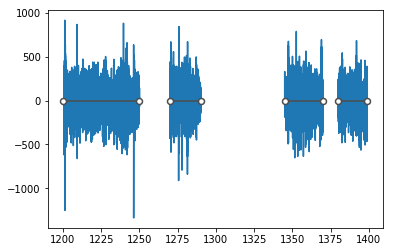

In [16]:
npl.plot(my_lfp23)
means = [snippet.mean() for snippet in my_lfp23]
npl.plot(my_lfp23.support, means)

36036000.0
1201.2
36019940.0
1200.66466667
[ 301 1202 1803]


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:589: UserWarning: meta data is not available
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:589: UserWarning: meta data is not available
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:59: UserWarning: No sampling frequency has been specified!
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:790: UserWarning: sampling rates are different; intersecting along time only and throwing away fs
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1212: Us

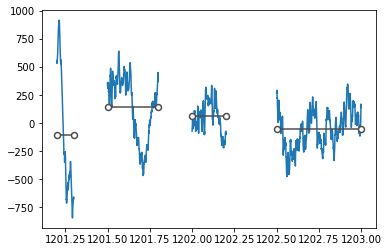

In [21]:
partialSupportForEtienne = EpochArray([[1200,1200.5], [1201.2,1201.3], [1201.5,1201.8],
                                       [1202,1202.2], [1202.5,1203]],fs=1)
my_lfp_for_etienne = my_lfp[partialSupportForEtienne]
print(my_lfp_for_etienne.tdata[0])
print(my_lfp_for_etienne.time[0])
print(my_lfp2.tdata[0])
print(my_lfp2.time[0])
npl.plot(my_lfp_for_etienne)
means = [snippet.mean() for snippet in my_lfp_for_etienne]
npl.plot(my_lfp_for_etienne.support, means)

/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1138: UserWarning: support created with given tdata and sampling rate, fs!


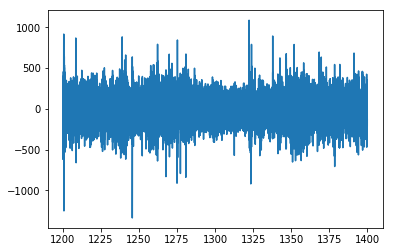

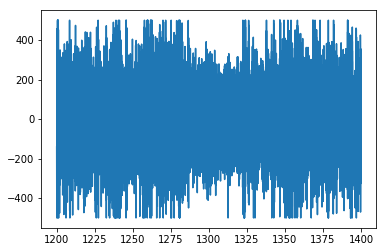

<EpochArray at 0x7f93d67bf7f0: 1 epoch> totaling 199.999666667 seconds

In [18]:
fakexdata = 3000*1200 + np.arange(0,len(lfp))
my_lfp1234 = AnalogSignal(lfp, tdata=fakexdata, fs=3000)
plt.plot(my_lfp1234.time, my_lfp1234.ydata)
plt.show()
plt.plot(my_lfp1234.clip(-500,500).time, my_lfp1234.clip(-500,500).ydata)
plt.show()
my_lfp1234.support

In [19]:
my_lfpCOPY = my_lfp1234.copy()
print(my_lfpCOPY)
print(my_lfp1234)

base <AnalogSignal  at 0x7f93c62f62b0: 1 epoch> totalling 199.999666667 seconds
base <AnalogSignal  at 0x7f93c62df128: 1 epoch> totalling 199.999666667 seconds
